# PSY-3035 Exam
Spring 2025, candidate 31

I haver chosen a dataset found on kaggle. The dataset shows Deaths related to substance abuse disorders in different age ranges for several countries

For this Exam I have two hypotheses that I wanted to explore and thus create graphs for.

H1: The death toll will be highest in the 15-49 age group.

H2: There's been an overall increase in deaths related to substance abuse disorderds from 1990 to 2019

I produced one preliminary graph and one improved graph for both hypotheses. Additionally I tried to visualize a graph that would encapsulate both hypotheses.

In [176]:
from pathlib import Path #imported to easily import the data
import pandas as pd #imported to look at and edit df


I start off by reading in the dataframe and checking my variables. I renamed some variables and had to clean some of the columns as certain groups of countries (e.g., UNESCO) was included in the variable 'Country'

In [4]:
#Reading in the dataframe
initial_df = pd.read_csv(Path("C:\\Users\\Jolanda\\Documents\\UIT\\MA\\År 1\\PSY-3035\\Github\\drugdeath_py\\data\\workshop4_druguse_archive\\deaths-substance-disorders-age.csv"))

In [6]:
initial_df

,Entity,Code,Year,Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number),Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number),Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number),Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number),Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number)
0,Afghanistan,AFG,1990,13,51,101,0,0
1,Afghanistan,AFG,1991,14,52,111,0,0
2,Afghanistan,AFG,1992,14,53,130,0,0
3,Afghanistan,AFG,1993,15,55,148,0,0
4,Afghanistan,AFG,1994,15,57,158,0,0
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,10,70,71,0,0
6836,Zimbabwe,ZWE,2016,10,74,75,0,0
6837,Zimbabwe,ZWE,2017,11,77,78,0,0
6838,Zimbabwe,ZWE,2018,11,80,81,0,0


In [10]:
def tweak_df(df):
    return(df.
           rename(columns={
               "Entity": "Country", 
               "Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number)":"Deaths_sud_70+",
               "Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number)": "Deaths_sud_50-69",
               "Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number)":"Deaths_sud_15-49",
               "Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number)":"Deaths_sud_under5",
               "Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number)":"Deaths_sud_5-14"
           }))

new_df = tweak_df(initial_df)

In [12]:
new_df

,Country,Code,Year,Deaths_sud_70+,Deaths_sud_50-69,Deaths_sud_15-49,Deaths_sud_under5,Deaths_sud_5-14
0,Afghanistan,AFG,1990,13,51,101,0,0
1,Afghanistan,AFG,1991,14,52,111,0,0
2,Afghanistan,AFG,1992,14,53,130,0,0
3,Afghanistan,AFG,1993,15,55,148,0,0
4,Afghanistan,AFG,1994,15,57,158,0,0
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,10,70,71,0,0
6836,Zimbabwe,ZWE,2016,10,74,75,0,0
6837,Zimbabwe,ZWE,2017,11,77,78,0,0
6838,Zimbabwe,ZWE,2018,11,80,81,0,0


# Dataframe cleanup

I realized that under the variable Country there were groups of countries listed such as World Bank High Income or Region of the Americas. I first needed to filter these. 

(I wasn't sure if this information was supposed to be here, so I left it. Skip down to HYPOTHESIS 1 and 2 to see the graphs

In [16]:
#I try to only list the countries that differ, and count them 

# makes a list of all unique values under the variable Country
unique_countries = new_df['Country'].unique()

#how many unique countries
num_countries = len(unique_countries)

#print the unique countries and the number of countries
print('List of Unique countries:', unique_countries)
print('Number of unique countries:', num_countries)

List of Unique countries: ['Afghanistan' 'African Region (WHO)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia & Pacific (WB)'
 'Eastern Mediterranean Region (WHO)' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe & Central Asia (WB)' 'European Region (WHO)' 'Fiji' 'Finland'
 'France' 'G20' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gr

I then made a list of the variable Code, in order to filter out all Countries (i.e., groups of countries) that weren't a single country.

In [18]:
# makes list of all country codes
unique_codes = new_df['Code'].unique()
num_codes = len(unique_codes)

print('List unique codes:', unique_codes)
print('Number of unique codes:', num_codes)

List unique codes: ['AFG' nan 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CAF'
 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'COK' 'CRI' 'CIV' 'HRV' 'CUB' 'CYP'
 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'FJI' 'FIN' 'FRA' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL'
 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HUN' 'ISL' 'IND' 'IDN'
 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MDG' 'MWI' 'MYS'
 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE'
 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NZL' 'NIC' 'NER' 'NGA' 'NIU'
 'PRK' 'MKD' 'MNP' 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER'
 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'VCT' 'WSM'
 'SMR' 'STP' 'SAU' 'SEN' 'SRB' 'SY

Noticing the discrepancy between the number of unique countries and unique codes, I listed out all values that did not have a code to verity that these were all groups of countries or regions.

In [20]:
#filter rows where the 'Code column is null (nan) or empty (no string or integer)
countries_noCode = new_df[new_df['Code'].isnull()|(new_df['Code'] == '')]

#list countries with no Code
countries_noCode_list = countries_noCode['Country'].unique()

#print the countries without code
print('Countries without codes:', countries_noCode_list)

Countries without codes: ['African Region (WHO)' 'East Asia & Pacific (WB)'
 'Eastern Mediterranean Region (WHO)' 'England'
 'Europe & Central Asia (WB)' 'European Region (WHO)' 'G20'
 'Latin America & Caribbean (WB)' 'Middle East & North Africa (WB)'
 'North America (WB)' 'Northern Ireland' 'OECD Countries'
 'Region of the Americas (WHO)' 'Scotland' 'South Asia (WB)'
 'South-East Asia Region (WHO)' 'Sub-Saharan Africa (WB)' 'Wales'
 'Western Pacific Region (WHO)' 'World Bank High Income'
 'World Bank Low Income' 'World Bank Lower Middle Income'
 'World Bank Upper Middle Income']


Here I noticed that some actual countries were on this countries_noCode_list, namely England, Wales, Scotland and Northern Ireland. So I opted for creating a new dataframe where I filtered out all values without a Code, but kept these countries.

In [29]:
# I make a list of coutnries with no code that I want to keep  
keep_noCode = ['England', 'Wales', 'Scotland', 'Northern Ireland']

#Then I create a new df that only has actual countries
#new df keeping all rows where there IS a Code OR(|) the values in the list I made
countries_df = new_df[
    (new_df['Code'].notna() | new_df['Country'].isin(keep_noCode)) &
    (new_df['Country'] != 'World')
]

#to check if it worked I print the dataframe and count the number of countries in this new df.
print(countries_df['Country'].unique())
print(len(countries_df['Country'].unique()))

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel

Thus I use the df: countries_df

In [31]:
countries_df

,Country,Code,Year,Deaths_sud_70+,Deaths_sud_50-69,Deaths_sud_15-49,Deaths_sud_under5,Deaths_sud_5-14
0,Afghanistan,AFG,1990,13,51,101,0,0
1,Afghanistan,AFG,1991,14,52,111,0,0
2,Afghanistan,AFG,1992,14,53,130,0,0
3,Afghanistan,AFG,1993,15,55,148,0,0
4,Afghanistan,AFG,1994,15,57,158,0,0
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,10,70,71,0,0
6836,Zimbabwe,ZWE,2016,10,74,75,0,0
6837,Zimbabwe,ZWE,2017,11,77,78,0,0
6838,Zimbabwe,ZWE,2018,11,80,81,0,0


# HYPOTHESIS 1
## There will be a higher prevalence of deaths related to substance abuse disorders in the age range of 15-49 

For this I create a bar chart showing the overall deaths by age group. I first calculate the absolute number of deaths per age group, then create the bar plot.

In [34]:
import matplotlib.pyplot as plt #import package for making graphs and figures in python

### H1 preliminary barplot

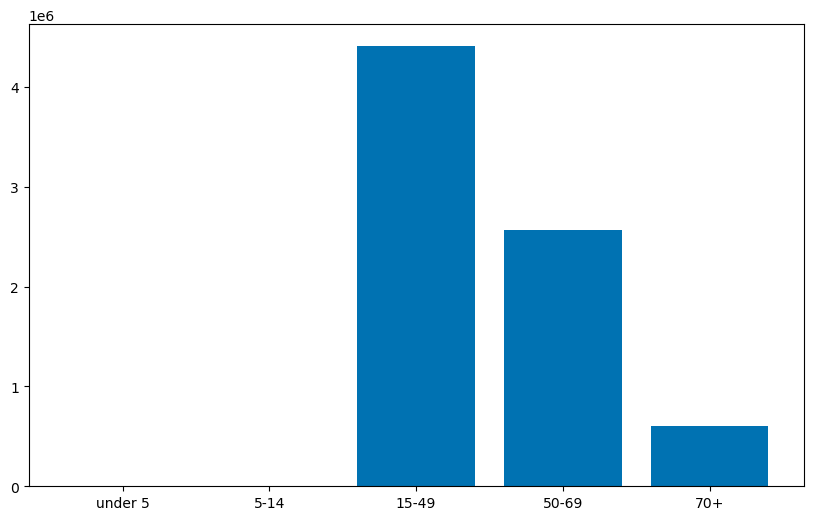

In [63]:
# summarizing deaths across all countries for each age group (stored in total_deaths)
total_deaths = {
    'under 5' : countries_df['Deaths_sud_under5'].sum(),
    '5-14' : countries_df['Deaths_sud_5-14'].sum(),
    '15-49' : countries_df['Deaths_sud_15-49'].sum(),
    '50-69': countries_df['Deaths_sud_50-69'].sum(),
    '70+': countries_df['Deaths_sud_70+'].sum()
}

# CREATING THE BAR PLOT
plt.figure(figsize=(10,6)) #creates the figure
plt.bar(total_deaths.keys(), total_deaths.values()) #adds the name for each age group and the values of them
plt.show()

### Issues with this bar plot
The first bar plot has some issues:

1 There is no title 

2 There is no label on y- and x-axis

3 No bars show for the Under 5 and 5-14 age group

4 The Y-axis is stated in 1e6, which might be the reason we cannot see the bars for these groups (i.e., the difference in death toll is too big to be visualized here

5 Visually boring

Thus for my second attempt I will improve on these areas 

1 & 2 I will add a title, and labels to the y- and x-axis 

3 & 4 I will change the scale on the Y-axis to a log scale, so that we can see the bars for all age groups

5 I will try to make the graph stand out more by using colors (e.g., highlight the bar that answers my hypotheses). For easier readability I will also add the total number of deaths on top of the bars
### H1 Improved bar plot

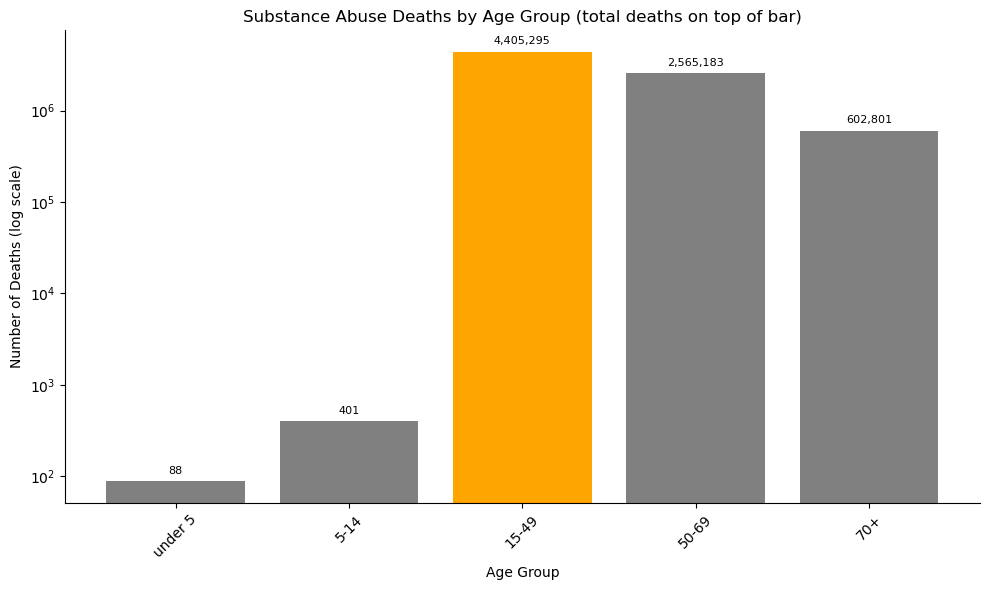

In [65]:
import matplotlib.ticker as ticker #imported so I can edit the tickers on the x-axis
plt.style.use('seaborn-v0_8-colorblind') #makes it so my plot is colorblind-friendly

fig, ax = plt.subplots(figsize=(10,6)) #creates the figure & axes

#I make a list with colors, so I can choose colors for my bar plot 
bar_colors = ['gray', 'gray', 'orange', 'gray', 'gray'] #this highlights the 15-49 age group (i.e., makes it orange)
bars = ax.bar(total_deaths.keys(), total_deaths.values(), color=bar_colors) #defines the bars, their name and color

# set y axis to log scale, so that smaller values will also show
ax.set_yscale('log')

#set a title and label the y- and x-axis
ax.set_title('Substance Abuse Deaths by Age Group (total deaths on top of bar)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Deaths (log scale)')

## EDITING VIZUALS
plt.xticks(rotation=45) #I rotate the text on the x-axis for easier readability

# I remove the borders on the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Using a log scale added irregular ticks to my plot
#I wanted to remove them as I found them distracting
from matplotlib.ticker import LogLocator
ax.yaxis.set_major_locator(LogLocator(base=10.0)) # only show major ticks to the powers of 10
ax.yaxis.set_minor_locator(ticker.NullLocator()) # removes smaller ticks

plt.tight_layout() #automatically fixes spacing of the graph, title and labels

#adding the total number of deaths for each age group on top of the bars
for bar in bars: #loops, i.e; for each bar...
    height = bar.get_height() #gets the height of the bar, ergo the number I want to display
    ax.annotate(f'{int(height):,}', #adds an integer (number)
               xy=  (bar.get_x() + bar.get_width() / 2, height), #places the label on top of and in the center of the bars
                xytext = (0, 4), #adjusts the space between label and bar
                textcoords = 'offset points', 
                ha='center', va='bottom', fontsize=8) #horizontal & vertical alignment, and size of the text

plt.show()

## Hypothesis 1 results: 
### I can reject the null hypothesis and claim that in this dataset the death toll is the highest among the 15-49 age group.

# Hypothesis 2
## There has been a general increase in deaths related to substance abuse disorders from 1990 to 2019 in the age range 15-49

For this I created a lineplot showing the average death toll per country per year.

### H2 Preliminary lineplot

C:\Users\Jolanda\AppData\Local\Temp\ipykernel_10704\259271054.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() #adjusts layout to make room for the legend


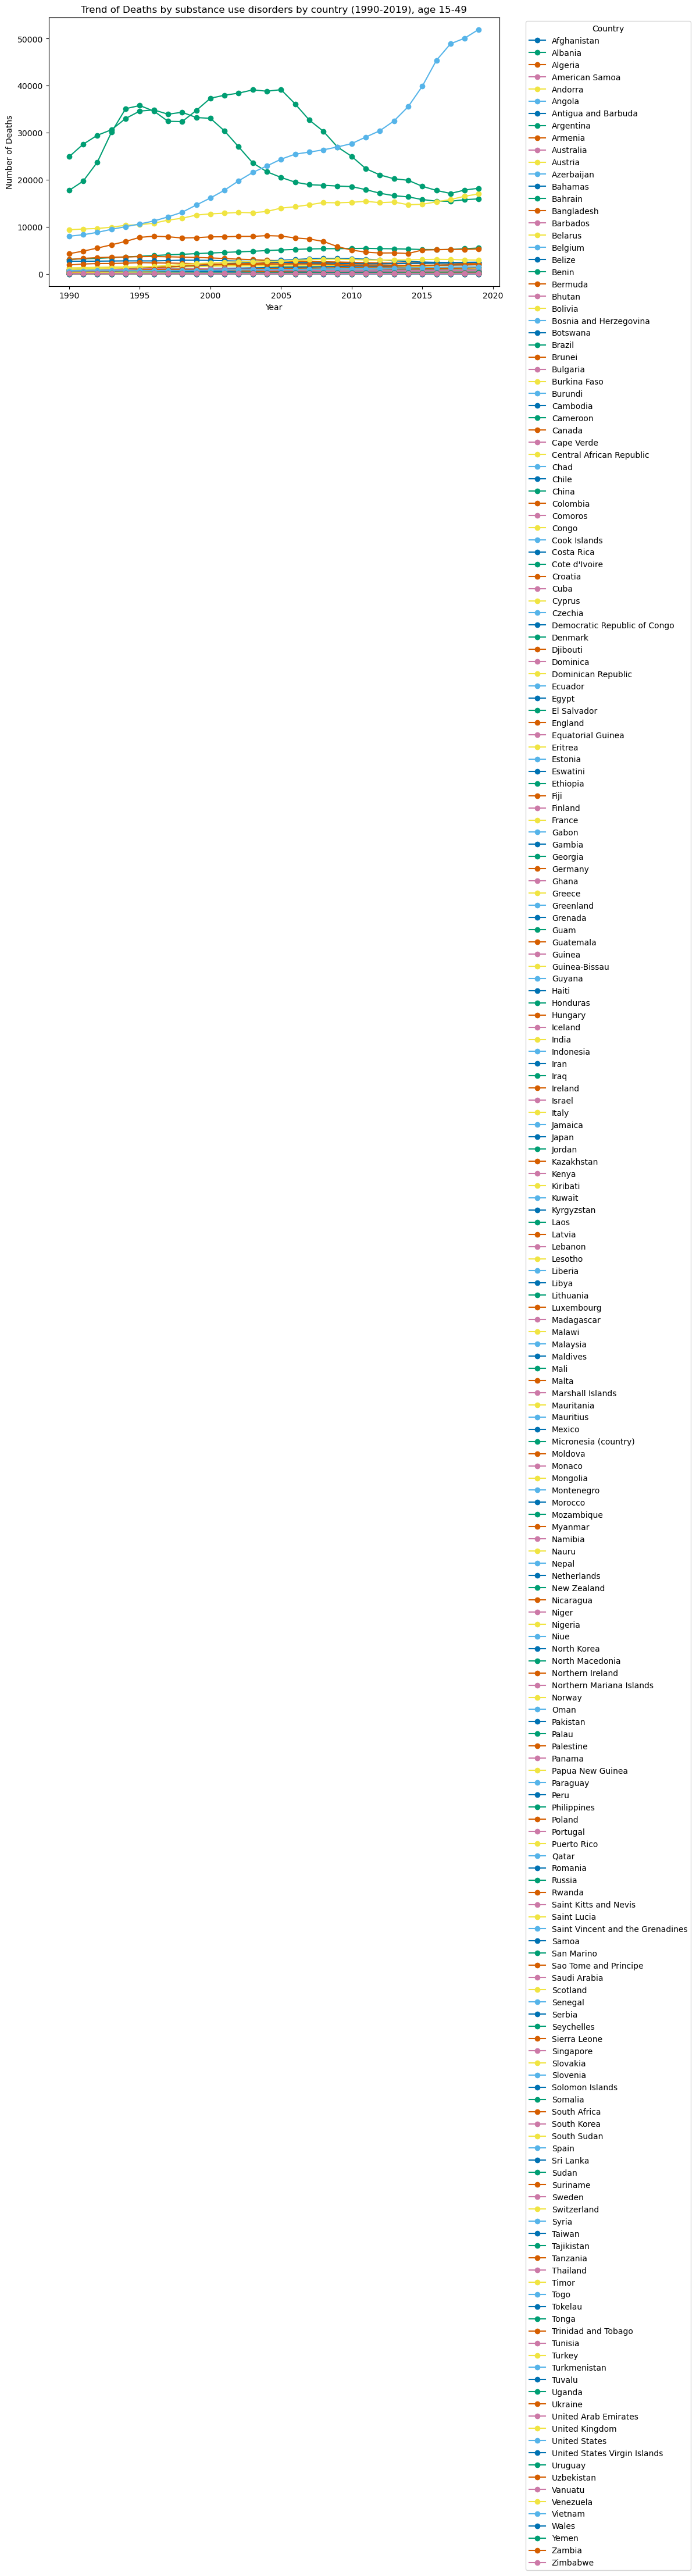

In [93]:
 #line plot for all countries and deaths by sud in the age range 15-49
plt.figure(figsize=(10, 6))

for Country, group in countries_df.groupby('Country'):
    plt.plot(group['Year'], group['Deaths_sud_15-49'], marker= 'o', linestyle='-', label=Country)

#Add labels, title, and legend

plt.title('Trend of Deaths by substance use disorders by country (1990-2019), age 15-49')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')

#Legend placed outside of the figure
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() #adjusts layout to make room for the legend
plt.show()

### Issues with this lineplot
The graph shows all countries and the death tolls per year, however due to the number of countries, years and number of deaths, it is hard to read anything from this graph. 

Because my hypothesis was about the overall trend in the world I opted for counting the total death toll for each year in the age gorup 15-49, thus creating a cleaner plot with only one line. I also edited it for easier readability.
## H2 Improved plot

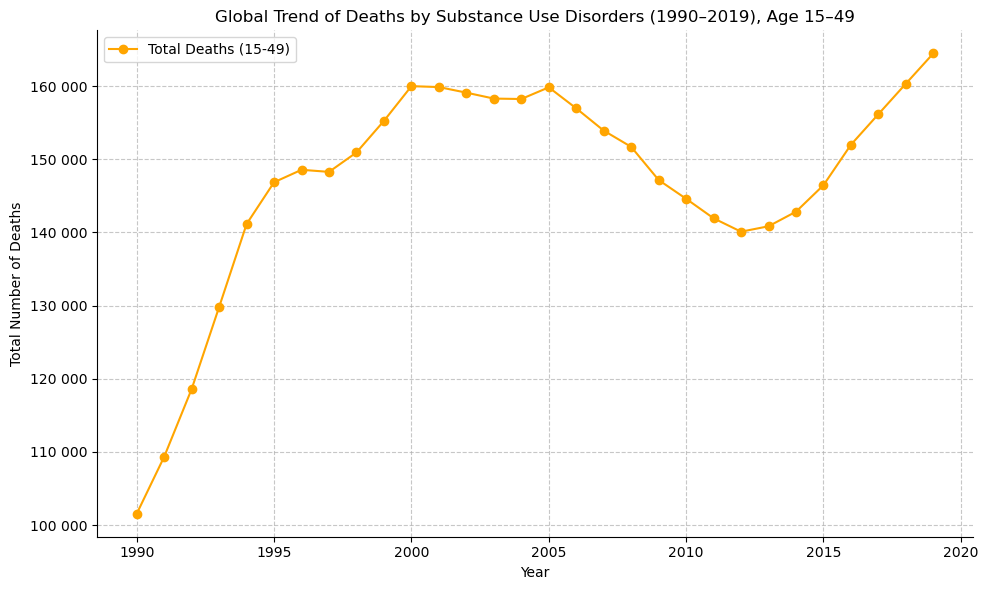

In [126]:
import matplotlib.ticker as ticker #imported so I can edit the tickers on the y- and x-axis
plt.style.use('seaborn-v0_8-colorblind') #makes it so my plot is colorblind-friendly

fig, ax = plt.subplots(figsize=(10,6)) #creates the figure & axes

#I group the df by year and calculate the total death toll
global_sum = countries_df.groupby('Year')['Deaths_sud_15-49'].sum() #total deaths globally (i.e., for all countries) per year


#PLOTTING THE LINE
ax.plot(global_sum.index, global_sum.values, marker='o', color='orange', label='Total Deaths (15-49)') #plots total number of deaths per year

# set a title and label the y- and x-axis
ax.set_title('Global Trend of Deaths by Substance Use Disorders (1990–2019), Age 15–49')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Deaths')

## EDITING VIZUALS
ax.spines['top'].set_visible(False) #removes the top border
ax.spines['right'].set_visible(False) #removes the right border

ax.grid(True, which='both', linestyle='--', alpha=0.7) #adds a grid with dashed lines

ax.legend(loc='upper left') #places the legend inside the graph

#adds a space between the numbers on the Y-axis for easier readability (i.e., 160 000, instead of 160000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

plt.tight_layout() #automatically fixes spacing of the graph, title and labels
plt.show()

# Hypothesis 2 results:
## There seems to be an overall increase in death toll by substance abuse disorder from 1990-2019, we can thus reject the null hypothesis